In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import csv
import keras
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU


In [2]:
with open("UROP_s2-2.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    open_price = []
    close_price = []
    high_price = []
    low_price = []
    volume = []
    ma_15days = []
    rsi = []
    daily_return = []
    macd = []
    signal = []
    for row in csv_reader:
        open_price.append(row[3])
        close_price.append(row[2])
        high_price.append(row[4])
        low_price.append(row[5])
        volume.append(row[7])
        daily_return.append(row[9])
        ma_15days.append(row[16])
        rsi.append(row[17])
        macd.append(row[24])
        signal.append(row[25])
    daily_return[0] = 0
    for i in range(15):
        ma_15days[i] = 0
        rsi[i] = 0
    for i in range(25):
        macd[i] = 0
    for i in range(33):
        signal[i] = 0
    for i in range(len(open_price)):
        open_price[i] = float(open_price[i])
        close_price[i] = float(close_price[i])
        high_price[i] = float(high_price[i])
        low_price[i] = float(low_price[i])
        volume[i] = float(volume[i])
        daily_return[i] = float(daily_return[i])
        ma_15days[i] = float(ma_15days[i])
        rsi[i] = float(rsi[i])
        macd[i] = float(macd[i])
        signal[i] = float(signal[i])

In [3]:
return_level = []
for i in daily_return:
    if i >= 0.02:
        return_level.append(2)
    elif i >= 0.005:
        return_level.append(1)
    elif i > -0.005:
        return_level.append(0)
    elif i > -0.02:
        return_level.append(-1)
    else :
        return_level.append(-2)

In [4]:
training_sets = []
training_label = []
for i in range(15, 315):
    training_label.append(return_level[i+1])
    temp_list = []
    #for j in range(5):
     #   temp_list.append(open_price[i+j-4])
      #  temp_list.append(close_price[i+j-4])
       # temp_list.append(high_price[i+j-4])
        #temp_list.append(low_price[i+j-4])
    #temp_list.append(ma_15days[i])
    temp_list.append(rsi[i])
    #temp_list.append(volume[i])
    temp_list.append(macd[i])
    temp_list.append(signal[i])
    training_sets.append(temp_list)

In [5]:
testing_sets = []
testing_label = []
for i in range(315, 900):
    testing_label.append(return_level[i+1])
    temp_list = []
    #for j in range(5):
     #   temp_list.append(open_price[i+j-4])
      #  temp_list.append(close_price[i+j-4])
       # temp_list.append(high_price[i+j-4])
        #temp_list.append(low_price[i+j-4])
    #temp_list.append(ma_15days[i])
    temp_list.append(rsi[i])
    #temp_list.append(volume[i])
    temp_list.append(macd[i])
    temp_list.append(signal[i])
    testing_sets.append(temp_list)

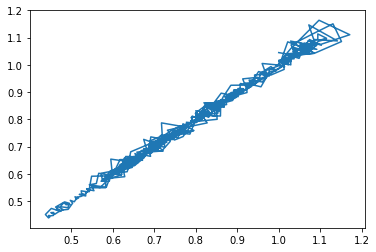

In [6]:
plt.plot(open_price,close_price)

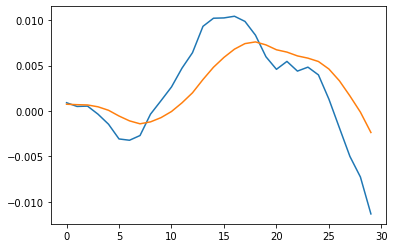

In [7]:
plt.plot(macd[50:80])
plt.plot(signal[50:80])

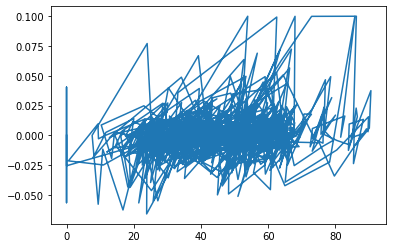

In [8]:
plt.plot(rsi,daily_return)

(array([  9.,  20., 111., 365., 310.,  75.,  20.,   5.,   5.,   6.]),
 array([-0.066044 , -0.0494396, -0.0328352, -0.0162308,  0.0003736,
         0.016978 ,  0.0335824,  0.0501868,  0.0667912,  0.0833956,
         0.1      ]),
 <a list of 10 Patch objects>)

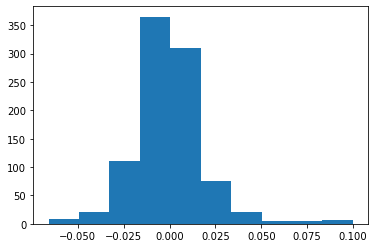

In [9]:
plt.hist(daily_return, bins = 10)

(array([107., 262., 264., 207.,  86.]),
 array([-2. , -1.2, -0.4,  0.4,  1.2,  2. ]),
 <a list of 5 Patch objects>)

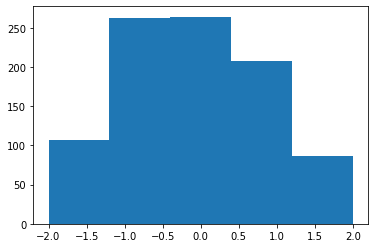

In [10]:
plt.hist(return_level, bins = 5)

In [11]:
x_train = np.array(training_sets)
x_test = np.array(testing_sets)
training_label = np.array(training_label)
y_train = keras.utils.to_categorical(training_label, num_classes=5)
y_test = keras.utils.to_categorical(testing_label, num_classes=5)
testing_label = np.array(testing_label)

In [12]:
from keras.models import Sequential
def make_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(10))
    model.add(LeakyReLU(0.1))
    model.add(Dense(5))
    model.add(Activation("softmax"))
    return model

In [13]:
#keras.clear_session()
model = make_model()
#model.summary()

In [14]:
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adam(learning_rate=0.001), # for SGD
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x_train, y_train,  # prepared data
    epochs=5000,
    #callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               #LrHistory(), 
               #keras_utils.TqdmProgressCallback(),
               #keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(x_test, y_test),
    shuffle=True,
    #verbose=0,
    #initial_epoch=last_finished_epoch or 0
)

Epoch 1/5000
10/10 [==============================] - 0s 17ms/step - loss: 13.3339 - accuracy: 0.2800 - val_loss: 12.6232 - val_accuracy: 0.2855
Epoch 2/5000
10/10 [==============================] - 0s 3ms/step - loss: 12.4119 - accuracy: 0.2800 - val_loss: 11.7731 - val_accuracy: 0.2855
Epoch 3/5000
10/10 [==============================] - 0s 4ms/step - loss: 11.5297 - accuracy: 0.2800 - val_loss: 10.9356 - val_accuracy: 0.2855
Epoch 4/5000
10/10 [==============================] - 0s 4ms/step - loss: 10.6547 - accuracy: 0.2800 - val_loss: 10.1165 - val_accuracy: 0.2855
Epoch 5/5000
10/10 [==============================] - 0s 3ms/step - loss: 9.8038 - accuracy: 0.2800 - val_loss: 9.3209 - val_accuracy: 0.2855
Epoch 6/5000
10/10 [==============================] - 0s 4ms/step - loss: 8.9704 - accuracy: 0.2800 - val_loss: 8.5370 - val_accuracy: 0.2855
Epoch 7/5000
10/10 [==============================] - 0s 3ms/step - loss: 8.1015 - accuracy: 0.2800 - val_loss: 7.5745 - val_accuracy: 0.28